# Continuous Probabilistic Methods

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(pd_series, multiplier = 1.5):
    """
    It creates the lower and the upper bounds of a series with a default multiplier of 1.5
    """
    #
    q1 = pd_series.quantile(0.25)
    q3 = pd_series.quantile(0.75)
    # calculate iqr
    iqr = q3 - q1
    # calculate upper and lower limits for the whiskers
    inner_lower_fence = q1 - (multiplier * iqr)
    inner_upper_fence = q3 + (multiplier * iqr)
    return inner_lower_fence, inner_upper_fence 

--------------------------
# 1 
Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
# set a variable named URL where we place the HTTPS as a string 
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [4]:
# Reed data as a apnda dataferame especifing the delimiter in order to create tabular data
df = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
# Change the mame of the columns to lower case
df.columns = df.columns.str.lower()

In [6]:
df.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
# Set the date colium as the index 
df.date = pd.to_datetime(df.date)
df = df.set_index("date")

In [8]:
# create colum that references the month 
df["month"] = df.index.month_name()

# EDA 

# Takeaway
- There is a few outliers
    - Outliers mainly happened during the summer month
    -  December my also experience outliers



# 1.1
Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [14]:
# set upper and lower bound fot df.temperature
temp_lower, temp_upper = get_lower_and_upper_bounds(df.temperature)

In [15]:
lower_temp_outliers = df[temp_lower > df.temperature]
lower_temp_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


In [16]:
# set upper and lower bound fot df.reinfall
rainfall_lower, rainfall_upper = get_lower_and_upper_bounds(df.rainfall)

In [17]:
# Get the lower outliers for rainfall 
lower_rainfall_outliers = df[rainfall_lower > df.rainfall]
lower_rainfall_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,


In [18]:
# set upper and lower bound fot df.flyers
flyers_lower, flyers_upper = get_lower_and_upper_bounds(df.flyers)
# Get the lower outliers for flyers 
lower_flyers_outliers = df[flyers_lower > df.flyers]
lower_flyers_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [19]:
# set upper and lower bound fot df.price
price_lower, price_upper = get_lower_and_upper_bounds(df.price)
# Get the lower outliers for price 
lower_price_outliers = df[price_lower > df.price]
lower_price_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,


In [20]:
# set upper and lower bound fot df.
sales_lower, sales_upper = get_lower_and_upper_bounds(df.sales)
# Get the lower outliers for price 
lower_sales_outliers = df[sales_lower > df.sales]
lower_sales_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,



Yes, this ouliers make sence. In fact, the only two columns return outliers and are the most minimum values in their range.

# 1.2
Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [21]:
upper_temp_outliers = df[temp_upper < df.temperature]
upper_temp_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


In [22]:
upper_rainfall_outliers = df[rainfall_upper < df.rainfall]
upper_rainfall_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


In [23]:
df.rainfall.describe()

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: rainfall, dtype: float64

There are a lot of outliers in this range. I would keep all records within three standard deviations, meaning anything below 1.55

In [24]:
upper_flyers_outliers = df[temp_upper < df.flyers]
upper_flyers_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,


In [25]:
upper_price_outliers = df[temp_upper < df.price]
upper_price_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,


In [26]:
upper_sales_outliers = df[temp_upper < df.sales]
upper_sales_outliers

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [27]:
df.sales.describe()

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: sales, dtype: float64

In [28]:
#calculate 3 standar diviations for sales
df.sales.describe()[5]

25.0

In [29]:
std = df.sales.describe()[2]
mid = df.sales.describe()[5]

In [30]:
# Upper limit for outliers 
mid + std + std + std 

117.84439595691894

Eliminate outliers in the sales colum taht are above 117.844

# 1.3
Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [31]:
# create a list with the name of the vaibles we want to find the lower and the upper limits to 
new_cols = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [32]:
# This for loop attachess the upper and the lower limmits by using get_lower_and_upper_bounds function 
#we create a dictionay that holds all the values and attaches and record of the data frame
multiplier_of_3 = {}
for col in new_cols:
    lower, upper = get_lower_and_upper_bounds(df[col], multiplier = 3)
    multiplier_of_3[col] = {'upper' : upper, 'lower' : lower}
    multiplier_of_3[col]['df'] = df[(df[col] > upper) | (df[col] < lower)]

In [33]:
multiplier_of_3['temperature']['df']

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


In [34]:
list(multiplier_of_3.keys())

['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [35]:
multiplier_of_3

{'temperature': {'upper': 137.7,
  'lower': -16.299999999999997,
  'df':                  day  temperature  rainfall  flyers  price  sales     month
  date                                                                       
  2017-02-11  Saturday        212.0      0.91      35    0.5     21  February},
 'rainfall': {'upper': 1.69,
  'lower': -0.13,
  'df':                 day  temperature  rainfall  flyers  price  sales     month
  date                                                                      
  2017-01-01   Sunday         27.0      2.00      15    0.5     10   January
  2017-12-05  Tuesday         22.0      1.82      11    0.5     10  December
  2017-12-10   Sunday         31.3      1.82      15    0.5     11  December
  2017-12-31   Sunday         15.1      2.50       9    0.5      7  December},
 'flyers': {'upper': 103.0,
  'lower': -23.0,
  'df':                 day  temperature  rainfall  flyers  price  sales     month
  date                                         

In [36]:
for _.lower in multiplier_of_3:
    print(lower)

AttributeError: 'dict' object has no attribute 'lower'

In [37]:
for col in multiplier_of_3:
    multiplier_of_3[col]['lower']

# 1.4
Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [38]:
# let's add an empty dataframe to store the lower and upper bounds
outer_bounds_df = pd.DataFrame(columns = ['feature', 'lower_bound', 'upper_bound'])

for column in df.select_dtypes(exclude = 'object'):
    lower, upper = get_lower_and_upper_bounds(df[column])
    l_df = {'feature':column, 'lower_bound':lower, 'upper_bound':upper}
    outer_bounds_df = outer_bounds_df.append(l_df, ignore_index = True)
    
outer_bounds_df.T

,0,1,2,3,4
feature,temperature,rainfall,flyers,price,sales
lower_bound,16.7,0.26,4.0,0.5,5.0
upper_bound,104.7,1.3,76.0,0.5,45.0


In [40]:
df.select_dtypes(exclude = 'object').describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


# 2
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

2.1 Use a 2 sigma decision rule to isolate the outliers.

2.1.1 Do these make sense?

2.1.2Should certain outliers be kept or removed?
 

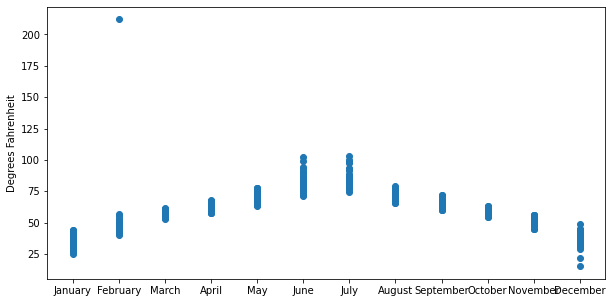

In [9]:
# ploit data and viculize posibele outliers for tempeerature
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.temperature)
plt.ylabel("Degrees Fahrenheit")
plt.show()

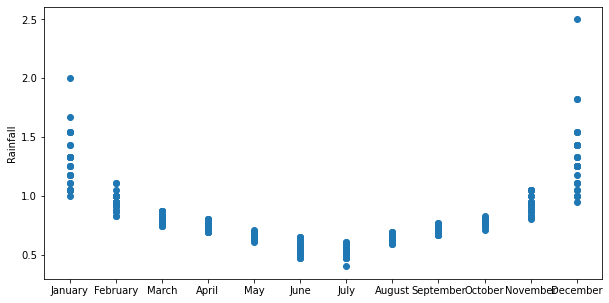

In [10]:
# ploit data and viculize posibele outliers for rainfall
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.rainfall)
plt.ylabel("Rainfall")
plt.show()

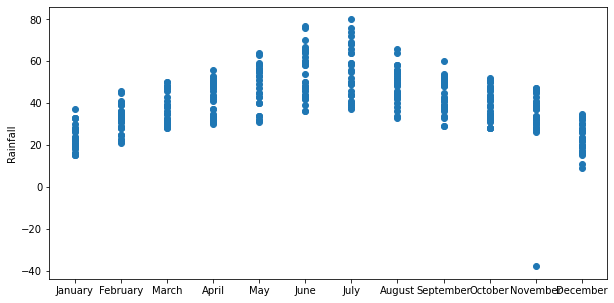

In [11]:
# ploit data and viculize posibele outliers for flyers
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.flyers)
plt.ylabel("Rainfall")
plt.show()

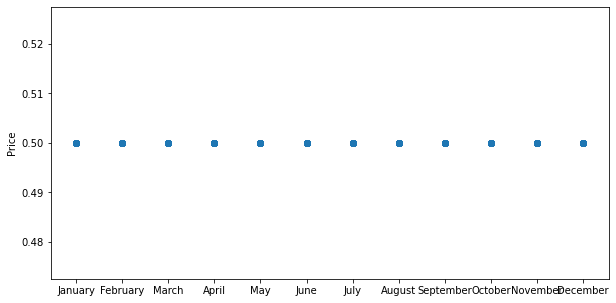

In [12]:
# ploit data and viculize posibele outliers for price
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.price)
plt.ylabel("Price")
plt.show()

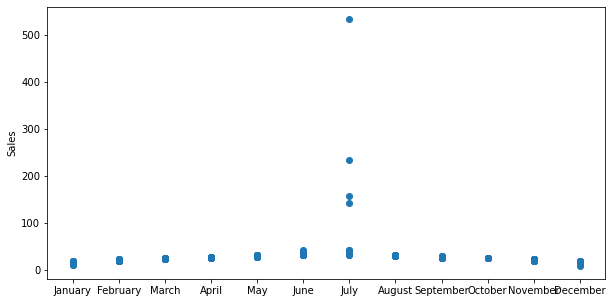

In [13]:
# ploit data and viculize posibele outliers for sales 
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.sales)
plt.ylabel("Sales")
plt.show()

In [42]:
columns_csv

['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales', 'month']

In [45]:
# let's create new columns to store the zvalues for the normally distributed columns:
for column in df[['temperature', 'rainfall', 'flyers', 'sales']]:
    df[column+'_zscore'] = (df[column] - df[column].mean())/df[column].std()

In [61]:
df_2sigma_outliers = pd.DataFrame()
for column in df[['temperature_zscore', 'rainfall_zscore', 'flyers_zscore', 'sales_zscore']]:
    print(f'------------------{column}---------------------------')
    print(df_2sigma_outliers.append(df[df[column].abs() >= 2]))
    print(f'-------------------------------------------------------')



------------------temperature_zscore---------------------------
                 day  temperature  rainfall  flyers  price  sales     month  \
date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   
2017-06-16    Friday         99.3      0.47      77    0.5     41      June   
2017-06-26    Monday        102.6      0.47      60    0.5     42      June   
2017-07-01  Saturday        102.9      0.47      59    0.5    143      July   
2017-07-10    Monday         98.0      0.49      66    0.5     40      July   
2017-07-18   Tuesday         99.3      0.47      76    0.5     41      July   
2017-07-22  Saturday         99.6      0.47      49    0.5     42      July   
2017-07-27  Thursday         97.9      0.47      74    0.5     43      July   
2017-12-05   Tuesday         22.0      1.82      11    0.5     10  December   
2017-12-31    Sunday         15.1      2.50       9    0.5      7  

## 2 sigma
- Temperature:
    - There is one day where the temperature is over 200n degrees. That is not posible
- Rainfall:
    - They all look with in the 2 sigam range 
- Flayer:
    - there is one oulier that goes as far as far as -38
    - That is over 5 sigma distance
- Sales Look ok



## 3 sigma

In [62]:
df_3sigma_outliers = pd.DataFrame()
for column in df[['temperature_zscore', 'rainfall_zscore', 'flyers_zscore']]:
    print(f'------------------{column}---------------------------')
    print(df_2sigma_outliers.append(df[df[column].abs() >= 3]))
    print(f'-------------------------------------------------------')

------------------temperature_zscore---------------------------
                 day  temperature  rainfall  flyers  price  sales     month  \
date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   

            temperature_zscore  rainfall_zscore  flyers_zscore  sales_zscore  
date                                                                          
2017-02-11            8.336627         0.306792      -0.370227     -0.221847  
-------------------------------------------------------
------------------rainfall_zscore---------------------------
                day  temperature  rainfall  flyers  price  sales     month  \
date                                                                         
2017-01-01   Sunday         27.0      2.00      15    0.5     10   January   
2017-01-16   Monday         30.6      1.67      24    0.5     12   January   
2017-12-05  Tuesday         22.0